# Exploratory Data Analysis on COVID-19 in Brazil

This notebook provides a comprehensive exploratory data analysis of COVID-19 in Brazil, offering valuable insights into the pandemic's impact on the country.

<center><img alt="covid-19-exploratory-data-analysis-pedro-henrique-figueiredo-magalhaes" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

The dataset is a collection of COVID-19 data maintained by [Our World in Data](https://ourworldindata.org/coronavirus). For more information on the dataset visit the [OWID repository](https://github.com/owid/covid-19-data/tree/master/public/data).

## Introduction

COVID-19, caused by the SARS-CoV-2 virus, has had profound effects globally since its emergence in late 2019. Primarily spread through respiratory droplets, the virus has exhibited a wide range of clinical manifestations, from mild to severe symptoms, and in some cases, leading to death. Over the past years, extensive research and data collection efforts have enhanced our understanding of the disease, though challenges remain due to its evolving nature.

### Context

As of the latest data from trusted sources like the World Health Organization (WHO), Johns Hopkins University, and the Brazilian Ministry of Health, it is observed that a significant portion of COVID-19 cases are either asymptomatic or mild, accounting for approximately 80% of infections. However, around 15% of infected individuals develop severe symptoms requiring oxygen support, while about 5% become critically ill, necessitating mechanical ventilation and intensive care.

Brazil has been one of the countries most affected by the COVID-19 pandemic, experiencing multiple waves of infection with varying intensity. To enhance situational awareness and guide public health responses, this notebook aims to perform an exploratory data analysis (EDA) on publicly available COVID-19 data in Brazil. The analysis will focus on understanding the spread, severity, and trends of the disease within the country, providing insights that could aid in policy-making and healthcare management.

## Conclusions and Insights

### Key Findings

1. KF 1
2. KF 2
3. KF 3

--- 

## Data Analysis Notebook

1. [**Data Collection and Import**](#data-collection-and-import)
    - Importing necessary libraries
    - Loading the dataset

2. [**Data Preprocessing**](#data-preprocessing)
    - Handling missing values
    - Data cleaning and formatting

3. [**Exploratory Data Analysis**](#exploratory-data-analysis)
    - Summary statistics
    - Visualization standards
    - Data Visualisation

4. [**Conclusions and Insights**](#conclusions-and-insights)
    - Key findings from the analysis

---
## Data dictionary 

### Confirmed cases

- total_cases: Total confirmed cases of COVID-19. Counts can include probable cases, where reported.
- total_cases_per_million: Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.

### Confirmed deaths

- total_deaths: Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.
- total_deaths_per_million: Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.

### Hospital & ICU

- hosp_patients: Number of COVID-19 patients in hospital on a given day.
- icu_patients: Number of COVID-19 patients in intensive care units (ICUs) on a given day.

### Policy responses

- stringency_index: Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).

### Others

- continent: Continent of the geographical location.
- location: Geographical location.
- iso_code: ISO 3166-1 alpha-3 – three-letter country codes. Note that OWID-defined regions (e.g. continents like 'Europe') contain prefix 'OWID_'.
- median_age: Median age of the population, UN projection for 2020.
- date: Date of observation.
- female_smokers: Share of women who smoke, most recent year available.
- male_smokers: Share of men who smoke, most recent year available.
- gdp_per_capita: Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available.
- human_development_index: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506.


---
## Credits

The raw data was collected, aggregated, and documented by Edouard Mathieu, Hannah Ritchie, Lucas Rodés-Guirao, Cameron Appel, Daniel Gavrilov, Charlie Giattino, Joe Hasell, Bobbie Macdonald, Saloni Dattani, Diana Beltekian, Esteban Ortiz-Ospina, and Max Roser.

Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Nat Hum Behav (2021). https://doi.org/10.1038/s41562-021-01122-8

Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8

---

## Data Collection and Import

Importing necessary libraries and loading the dataset.


In [923]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [924]:
data = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

df_raw = pd.read_csv(data,low_memory=False)

df_raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409894,ZWE,Africa,Zimbabwe,2024-06-12,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
409895,ZWE,Africa,Zimbabwe,2024-06-13,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
409896,ZWE,Africa,Zimbabwe,2024-06-14,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
409897,ZWE,Africa,Zimbabwe,2024-06-15,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [925]:
print(f"Dataset has {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.\n")
print(df_raw.columns)

Dataset has 409899 rows and 67 columns.

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations

In [926]:
df_raw.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Date column is **not** formatted as date, so let's format this column using *pd.to_datetime*.

In [927]:
df_raw.date = pd.to_datetime(df_raw.date)
df_raw.date.max()

Timestamp('2024-07-13 00:00:00')

We can find the latest figures for total deaths worldwide. 

In [928]:
df_raw.loc[df_raw.date == '2024-06-15',['total_deaths','location']].sort_values(by='total_deaths',ascending=False)[0:20]

,total_deaths,location
404995,7051323.0,World
157552,2990040.0,High income
390769,2667912.0,Upper middle income
115240,2100992.0,Europe
264132,1667166.0,North America
21127,1637123.0,Asia
342295,1354226.0,South America
209633,1341344.0,Lower middle income
116891,1261679.0,European Union
387519,1188935.0,United States


In [929]:
deaths_world = df_raw.loc[(df_raw.date == '2024-06-15'),['total_deaths','location']].sort_values(by='total_deaths',ascending=False)[0:1].iloc[0,0]

print(f"From the start of the pandemic back in 2018 until June 15th 2024, {round(deaths_world/1000000,2)} million people have died from COVID-19 worldwide.")

From the start of the pandemic back in 2018 until June 15th 2024, 7.05 million people have died from COVID-19 worldwide.


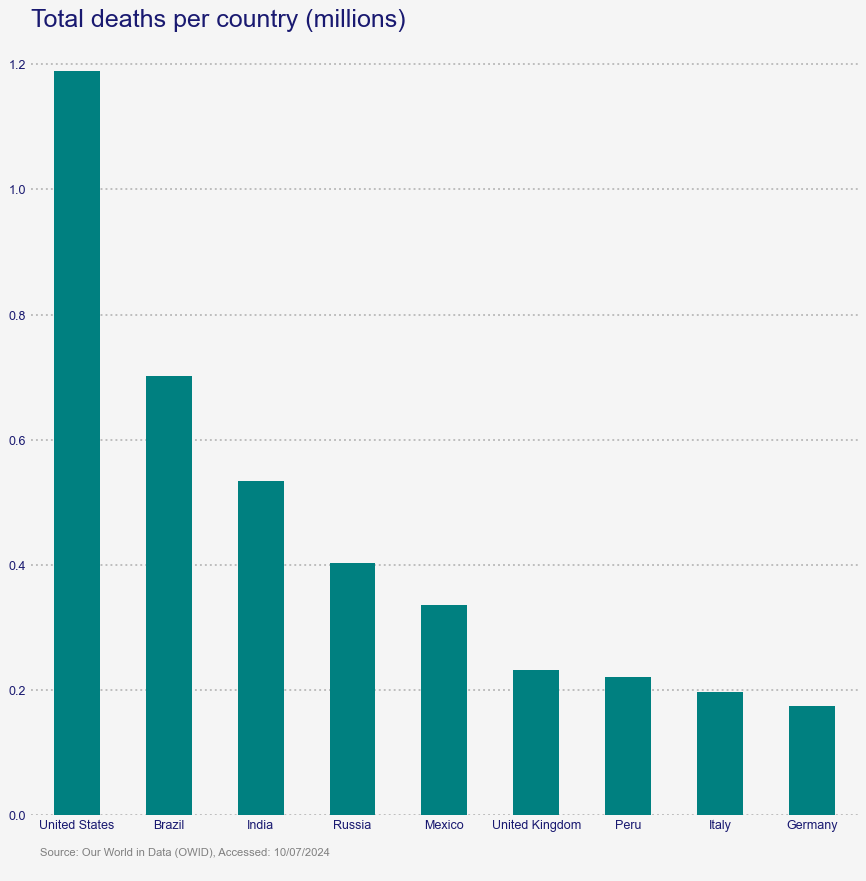

In [930]:
# here we filter for countries only by adding the column 'continent' and dropping rows with NaN values, meaning continents on 'location' get removed
deaths_top_10_countries =  df_raw.loc[df_raw.date == '2024-06-15',['total_deaths','location','continent']].sort_values(by='total_deaths',ascending=False)[9:19].set_index('location').dropna(axis=0)

# dividing by 1M to improve readability of the y-axis
deaths_top_10_countries = deaths_top_10_countries['total_deaths']/1000000

fig,ax = plt.subplots(figsize=(10,10),dpi=90);

fig.set(tight_layout=True)

deaths_top_10_countries.plot(kind='bar',
                             color='teal',
                             alpha=1,
                             zorder=3,
                             ax=ax);

fig.set_facecolor('whitesmoke')

ax.set_facecolor(color='whitesmoke')

ax.set_title("Total deaths per country (millions)",
             color='midnightblue',
             fontfamily='Arial',
             fontsize=20,
             loc='left')

ax.set_xlabel("").set_visible(False)

ax.xaxis.set_tick_params(rotation=0,
                         labelcolor='midnightblue',
                         size=0
                         )

ax.yaxis.set_tick_params(labelcolor='midnightblue',size=0)

ax.spines[:].set_visible(False)

ax.grid(axis='y',
        linewidth=1.5,
        linestyle='dotted',
        color='grey',
        alpha=0.5,
        zorder=0)

ax.legend().set_visible(False)

ax.annotate(text="Source: Our World in Data (OWID), Accessed: 10/07/2024",
            xycoords='figure pixels',
            xy=(40,25),
            color='grey',
            size=9
            );

## Data Preprocessing

### Handling Missing Values

Firstly, let's find the percentage of missing values in the data.

In [931]:
round(df_raw.isna().sum().sort_values(ascending=False)/df_raw.shape[0],2)[0:60]

weekly_icu_admissions_per_million             0.97
weekly_icu_admissions                         0.97
excess_mortality_cumulative_per_million       0.97
excess_mortality                              0.97
excess_mortality_cumulative                   0.97
excess_mortality_cumulative_absolute          0.97
weekly_hosp_admissions_per_million            0.94
weekly_hosp_admissions                        0.94
icu_patients                                  0.90
icu_patients_per_million                      0.90
hosp_patients_per_million                     0.90
hosp_patients                                 0.90
total_boosters_per_hundred                    0.87
total_boosters                                0.87
new_vaccinations                              0.83
new_tests                                     0.82
new_tests_per_thousand                        0.82
people_fully_vaccinated                       0.81
people_fully_vaccinated_per_hundred           0.81
total_tests                    

We should take note that we're dealing with a time series, in which days are the observation unit. This means that missing values for many of the columns in the dataset represent events that weren't observed. For example, 90% of data in column *icu_patients* is missing, while data spans from 2020 to 2024. During this period it is likely that the pandemic is under control in most, if not all countries. Therefore, it's expected that during this period there are less ICU patients, and that there's no reason to remove these entries as it may affect other data points.

Bellow we filter the dataset for the country we're interested in: Brazil. Then we'll have another look at missing values for relevant columns (refer to [**Data Dictionary**](#data-dictionary)). Furthermore, we'll look at data from 2020 to 2024 and study the effects of COVID-19 with data that is more consolidated now the pandemic is under control. 

In [932]:
df_br = df_raw.loc[(df_raw['location'] == 'Brazil') & (df_br['date'] < "2024-06-15")]
df_br

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
48797,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
48798,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
48799,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
48800,BRA,South America,Brazil,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
48801,BRA,South America,Brazil,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49518,BRA,South America,Brazil,2021-12-26,22230737.0,21717.0,3102.429,618392.0,791.0,113.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
49519,BRA,South America,Brazil,2021-12-27,22230737.0,0.0,3102.429,618392.0,0.0,113.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
49520,BRA,South America,Brazil,2021-12-28,22230737.0,0.0,3102.429,618392.0,0.0,113.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
49521,BRA,South America,Brazil,2021-12-29,22230737.0,0.0,3102.429,618392.0,0.0,113.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


We can see that after 2021 we don't have data for Brazil, however we do have nearly 2 years worth of data that we can analyse.

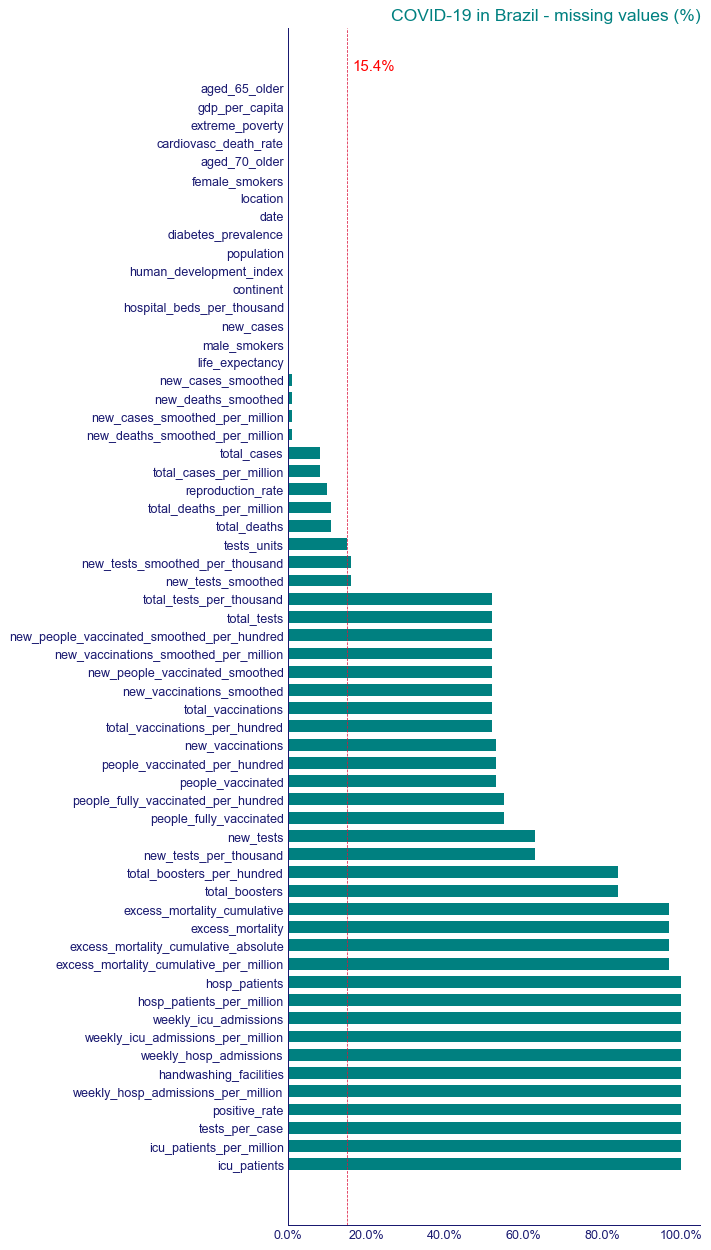

In [933]:
# we can get a visual representation of missing values using a histogram
missing_data_br = round(df_br.isna().sum().sort_values(ascending=False)/df_br.shape[0],2)[0:60]

fig,ax = plt.subplots(figsize=(8,14),dpi=90)

fig.set(tight_layout=True)

ax.barh(y=missing_data_br.index,
        width=missing_data_br*100,
        height=0.65,
        color='teal',
        );

ax.set_title("COVID-19 in Brazil - missing values (%)",
             size=14,
             loc='right',
             color='teal'
             )

ax.spines[['right','top']].set_visible(False)

ax.spines[['left','bottom']].set_color('midnightblue')

ax.xaxis.set_tick_params(size=0,
                         labelcolor='midnightblue')

ax.yaxis.set_tick_params(size=0,
                         labelcolor='midnightblue')

ax.xaxis.set_major_formatter('{x}%')

ax.axvline(15,
           color='crimson',
           linewidth=0.6,
           linestyle='dashed')

cutoff_val = round(df_br['tests_units'].isna().value_counts(1).iloc[1]*100,1)

ax.text(x=cutoff_val+1,
        y=60,
        s=f"{cutoff_val}%",
        color='red',
        size=12
        );

### Data Cleaning and Formatting



For the purpose of this analysis we'll focus on confirmed deaths and confirmed cases. We can remove the other columns, which also happen to have upwards of 40% of data missing. To do this we can follow the steps:

1. Define a cutoff to filter the data so that we capture most of the data we need.
2. Get the names of the columns that has missing values exceeding the cutoff value.
3. Create a new DataFrame for the filtered dataset and drop the columns using the list from step 2. 

In [934]:
df_br_clean_cols = missing_data_br[missing_data_br >= cutoff_val/100-0.01].index.tolist()
df_br_clean_cols

['icu_patients',
 'icu_patients_per_million',
 'tests_per_case',
 'positive_rate',
 'weekly_hosp_admissions_per_million',
 'handwashing_facilities',
 'weekly_hosp_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_icu_admissions',
 'hosp_patients_per_million',
 'hosp_patients',
 'excess_mortality_cumulative_per_million',
 'excess_mortality_cumulative_absolute',
 'excess_mortality',
 'excess_mortality_cumulative',
 'total_boosters',
 'total_boosters_per_hundred',
 'new_tests_per_thousand',
 'new_tests',
 'people_fully_vaccinated',
 'people_fully_vaccinated_per_hundred',
 'people_vaccinated',
 'people_vaccinated_per_hundred',
 'new_vaccinations',
 'total_vaccinations_per_hundred',
 'total_vaccinations',
 'new_vaccinations_smoothed',
 'new_people_vaccinated_smoothed',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed_per_hundred',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_units']

In [935]:
df_br_clean = df_br.drop(columns=df_br_clean_cols)

print(f"Columns in original dataset: {df_raw.shape[1]}\nColumns in the filtered dataset: {df_br_clean.shape[1]}\n")

print("Missing values in filtered dataset (%)")

round(df_br_clean.isna().sum().sort_values(ascending=False)/df_br_clean.shape[0],2)


Columns in original dataset: 67
Columns in the filtered dataset: 32

Missing values in filtered dataset (%)


total_deaths_per_million           0.11
total_deaths                       0.11
reproduction_rate                  0.10
total_cases                        0.08
total_cases_per_million            0.08
new_cases_smoothed                 0.01
new_deaths_smoothed                0.01
new_cases_smoothed_per_million     0.01
new_deaths_smoothed_per_million    0.01
hospital_beds_per_thousand         0.00
life_expectancy                    0.00
male_smokers                       0.00
aged_65_older                      0.00
female_smokers                     0.00
human_development_index            0.00
diabetes_prevalence                0.00
cardiovasc_death_rate              0.00
extreme_poverty                    0.00
gdp_per_capita                     0.00
aged_70_older                      0.00
iso_code                           0.00
median_age                         0.00
population_density                 0.00
stringency_index                   0.00
continent                          0.00


## Exploratory Data Analysis


### Summary Statistics

The most recent data for Brazil will have the cumulative data on cases, deaths and other indicators. Then we can have a look at the descriptive statistics for the columns in the *df_br_clean* dataset.


In [936]:
df_br_clean.loc[df_br_clean['date'] == df_br_clean['date'].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
49522,BRA,South America,Brazil,2021-12-30,22230737.0,0.0,3102.429,618392.0,0.0,113.0,...,14103.452,3.4,177.961,8.11,10.1,17.9,2.2,75.88,0.765,215313504.0


In [937]:
df_br_clean.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
count,726,6.700000e+02,726.000000,721.000000,649.000000,726.000000,721.000000,670.000000,726.000000,721.000000,...,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,7.260000e+02,726.0
mean,2021-01-01 12:00:00,1.040260e+07,30620.849862,30824.593871,297428.355932,851.779614,857.373110,48313.756193,142.215185,143.161438,...,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0
min,2020-01-05 00:00:00,1.000000e+00,0.000000,0.000000,11.000000,0.000000,0.000000,0.005000,0.000000,0.000000,...,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0
25%,2020-07-04 06:00:00,3.040712e+06,0.000000,10413.571000,119504.000000,0.000000,331.857000,14122.252000,0.000000,48.365000,...,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0
50%,2021-01-01 12:00:00,8.753920e+06,0.000000,29930.286000,230034.000000,0.000000,703.286000,40656.623000,0.000000,139.008000,...,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0
75%,2021-07-01 18:00:00,1.902050e+07,0.000000,46333.429000,540398.000000,0.000000,1055.286000,88338.626000,0.000000,215.191000,...,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0
max,2021-12-30 00:00:00,2.223074e+07,533024.000000,76146.286000,618392.000000,21094.000000,3013.429000,103248.225000,2475.572000,353.653000,...,1.410345e+04,3.400000e+00,1.779610e+02,8.110000e+00,1.010000e+01,1.790000e+01,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0
std,NaN,8.016142e+06,95544.013509,22287.050067,217450.603477,2815.526086,713.221713,37230.094107,443.743698,103.509782,...,2.293507e-10,4.666151e-14,1.507389e-12,6.932568e-14,1.244307e-13,2.275304e-13,2.799691e-14,8.674598e-13,1.033219e-14,0.0


In [938]:
deaths_per_case_ratio = round(df_br_clean['total_deaths'].max()/df_br_clean['total_cases'].max()*100,2)
print(f"The mortality rate of COVID-19 in Brazil between 2020 and 2022 is {deaths_per_case_ratio}%. Meaning that nearly 3 out of 100 reported cases unfortunately led to a death for which COVID-19 was the cause.")

The mortality rate of COVID-19 in Brazil between 2020 and 2022 is 2.78%. Meaning that nearly 3 out of 100 reported cases unfortunately led to a death for which COVID-19 was the cause.


In [939]:
df_br_clean.loc[df_br_clean['date'] == df_br_clean.date.max()][['total_cases','total_deaths','new_cases','new_deaths']]

,total_cases,total_deaths,new_cases,new_deaths
49522,22230737.0,618392.0,0.0,0.0


The stringency index is a composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response). We can explore how Brazil and other countries in South America responded to the pandemic over time. Note that we have to match the date range from South America to Brazil's available data.  

In [940]:
str_index_south_america = df_raw.loc[(df_raw['continent']=='South America') & (df_raw['date']<=df_br_clean.date.max()) & (df_raw['location'] != 'Brazil')]['stringency_index'].describe()
print(str_index_south_america)

print("\n")
print(df_br_clean['stringency_index'].describe())

most_strict_south_america = df_raw.loc[(df_raw['stringency_index'] == df_raw['stringency_index'].max()) & (df_raw['continent']=='South America')]['location'].value_counts()

count    7990.000000
mean       61.838889
std        25.556287
min         0.000000
25%        49.070000
50%        68.520000
75%        81.480000
max       100.000000
Name: stringency_index, dtype: float64


count    726.000000
mean      58.932410
std       19.886519
min        0.000000
25%       56.185000
50%       61.570000
75%       70.830000
max       81.020000
Name: stringency_index, dtype: float64


In [941]:
print(f"Brazil's response was moderately stringent with an average Government Response Stringency index of {round(df_br_clean['stringency_index'].mean(),1)} out of 100.\n")
print(f"Other countries in South America were only slightly more stringent, with an average Government Response Stringency index of {round(str_index_south_america.iloc[1],1)} out of 100.\n")
print(f"The two most strict countries in South America were {most_strict_south_america.index[0]} and {most_strict_south_america.index[1]}.")

Brazil's response was moderately stringent with an average Government Response Stringency index of 58.9 out of 100.

Other countries in South America were only slightly more stringent, with an average Government Response Stringency index of 61.8 out of 100.

The two most strict countries in South America were Argentina and Suriname.


### Visualization standards


In [942]:
# defining figure params for all plots
plt.rcParams['font.family']='Arial'

# defining colours for all plots using hex codes
col_lightblue = "#98B8DC"
col_blue = "#005FFB"
col_navy = "#053259"
col_darkblue = "#042440"
col_accent = "#D60F34"
col_green = "#3A6352"
col_grey = "#5D615B"
col_lightgrey = "#C7CCD1"
col_sand = "#CAC1B7"
col_yellow = "#EFCD72"

### Data Analysis

log scale! 
1. total cases over time for the world
2. total cases over time filtering split by continent 
3. total cases over time in South America split by country

log scale! 
1. total deaths over time worldwide
2. total deaths over time split by continent
3. total deaths over time in South America split by country

stringency index over time




## Conclusions and Insights

### Key Findings

1. KF 1
2. KF 2
3. KF 3

### Implications and Recommendations

1. asd
2. asd
3. asd